In [76]:
# ==========================================
# Student Details
# Student Name  : Anayat Singh
# Student ID    : 62960
# Campus        : Melbourne
# Subject Code  : ICT603
# Assessment No : Assessment 1
# ==========================================

# ----------- Import Required Libraries -----------
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# ----------- Generate Date & Time -----------
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_times = [
    start_date + timedelta(seconds=random.randint(0, int((end_date - start_date).total_seconds())))
    for _ in range(1000)
]

# ----------- Generate Customer and Product Info -----------
customer_ids = ['C' + str(i).zfill(4) for i in range(1, 1001)]
product_ids = ['P' + str(i).zfill(3) for i in range(1, 101)]

# ----------- Generate Sales Data -----------
quantities_sold = np.random.randint(1, 10, size=1000)
unit_prices = np.random.uniform(1, 100, size=1000)
total_transaction_amounts = quantities_sold * unit_prices

# ----------- Assign Store IDs -----------
store_id_pool = ['S' + str(i).zfill(3) for i in range(1, 11)]
store_ids = [random.choice(store_id_pool) for _ in range(1000)]

# ----------- Create DataFrame -----------
data = {
    'Date & Time': date_times,
    'Customer ID': random.choices(customer_ids, k=1000),
    'Product ID': random.choices(product_ids, k=1000),
    'Quantity Sold': quantities_sold,
    'Unit Price': unit_prices,
    'Total Transaction Amount': total_transaction_amounts,
    'Store ID': store_ids
}

df = pd.DataFrame(data)

# ----------- Final Formatting -----------
df['Date & Time'] = pd.to_datetime(df['Date & Time'])
df = df.sort_values(by='Date & Time')
df.reset_index(drop=True, inplace=True)

# ----------- Save to CSV -----------
df.to_csv("ICT603_A1.csv", index=False)

# ----------- Output Preview (Optional) -----------
print(df.head())

          Date & Time Customer ID Product ID  Quantity Sold  Unit Price  \
0 2023-01-01 03:15:14       C0604       P083              2   45.345454   
1 2023-01-01 23:53:04       C0258       P068              8    9.948741   
2 2023-01-02 01:44:40       C0536       P016              6    2.518413   
3 2023-01-02 04:53:45       C0634       P020              4   75.826673   
4 2023-01-02 18:43:14       C0494       P043              1   72.454382   

   Total Transaction Amount Store ID  
0                 90.690907     S004  
1                 79.589928     S003  
2                 15.110478     S006  
3                303.306693     S005  
4                 72.454382     S008  


# # Descriptive Statistics - SmartMart Dataset

In [77]:
# Loading the dataset
df = pd.read_csv("ICT603_A1.csv")

In [78]:
# Converting 'Date & Time' column to datetime (if not already)
df['Date & Time'] = pd.to_datetime(df['Date & Time'])


In [79]:
# General Summary Statistics ---
print("General Summary Statistics ")
print(df.describe())

General Summary Statistics 
                         Date & Time  Quantity Sold   Unit Price  \
count                           1000    1000.000000  1000.000000   
mean      2023-06-25 17:59:53.960000       5.143000    49.546565   
min              2023-01-01 03:15:14       1.000000     1.271724   
25%    2023-03-22 03:45:15.750000128       3.000000    25.378132   
50%       2023-06-28 02:47:59.500000       5.000000    48.225527   
75%    2023-09-21 22:43:08.750000128       7.000000    73.826103   
max              2023-12-30 16:30:39       9.000000    99.973383   
std                              NaN       2.602561    28.317806   

       Total Transaction Amount  
count               1000.000000  
mean                 254.913987  
min                    1.271724  
25%                   81.048458  
50%                  193.080523  
75%                  376.796624  
max                  897.349933  
std                  209.077358  


In [80]:
# Additional Info about Dataset
print("\nDataset Info")
print(df.info())



Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date & Time               1000 non-null   datetime64[ns]
 1   Customer ID               1000 non-null   object        
 2   Product ID                1000 non-null   object        
 3   Quantity Sold             1000 non-null   int64         
 4   Unit Price                1000 non-null   float64       
 5   Total Transaction Amount  1000 non-null   float64       
 6   Store ID                  1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None


In [81]:
# Sales Summary by Store
print("\n-Total & Average Sales per Store ")
sales_by_store = df.groupby('Store ID')['Total Transaction Amount'].agg(['sum', 'mean', 'max', 'min', 'count'])
print(sales_by_store)



-Total & Average Sales per Store 
                   sum        mean         max        min  count
Store ID                                                        
S001      26111.794999  261.117950  896.596876   3.935159    100
S002      21369.979514  267.124744  773.079964  11.682683     80
S003      30357.689848  257.268558  768.383172   6.572844    118
S004      21470.031463  261.829652  762.472002   1.861306     82
S005      27090.595539  255.571656  854.674479  10.268844    106
S006      29647.263646  255.579859  895.491803   1.733816    116
S007      28513.851811  243.708135  897.349933   3.928116    117
S008      20697.103448  235.194357  811.531615   1.271724     88
S009      26028.683522  250.275803  795.841896   7.697581    104
S010      23626.993371  265.471836  831.418489   1.376164     89


In [82]:
# Top 5 Most Sold Products
print("\n Top 5 Most Sold Products (by quantity) ")
top_products = df.groupby('Product ID')['Quantity Sold'].sum().sort_values(ascending=False).head(5)
print(top_products)


 Top 5 Most Sold Products (by quantity) 
Product ID
P057    105
P001     88
P044     87
P003     83
P031     82
Name: Quantity Sold, dtype: int64


In [83]:
# Monthly Sales Summary ---
print("\n----- Monthly Sales Summary -----")
df['Month'] = df['Date & Time'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Transaction Amount'].sum()
print(monthly_sales)


----- Monthly Sales Summary -----
Month
2023-01    26283.875869
2023-02    19195.002233
2023-03    22036.245183
2023-04    16402.976576
2023-05    21429.290477
2023-06    16908.634230
2023-07    28310.527219
2023-08    27129.019599
2023-09    23687.232955
2023-10    18811.606894
2023-11    15973.600391
2023-12    18745.975535
Freq: M, Name: Total Transaction Amount, dtype: float64


In [84]:
# Summary of Quantity Sold & Unit Price
print("\nQuantity Sold & Unit Price Summary")
print(df[['Quantity Sold', 'Unit Price']].describe())



Quantity Sold & Unit Price Summary
       Quantity Sold   Unit Price
count    1000.000000  1000.000000
mean        5.143000    49.546565
std         2.602561    28.317806
min         1.000000     1.271724
25%         3.000000    25.378132
50%         5.000000    48.225527
75%         7.000000    73.826103
max         9.000000    99.973383


#  Correlation Analysis - SmartMart Dataset

In [85]:
#importing important library for correlation
import seaborn as sns
import matplotlib.pyplot as plt

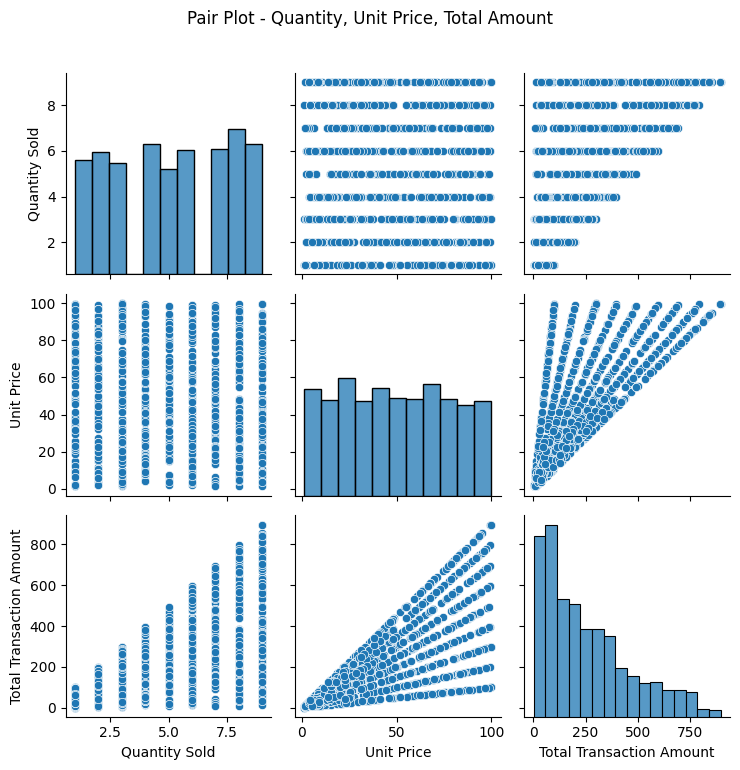

In [86]:
# Pair Plot -
numeric_cols = ['Quantity Sold', 'Unit Price', 'Total Transaction Amount'] # Select numeric columns for correlation
# Createing pairplot
sns.pairplot(df[numeric_cols])
plt.suptitle("Pair Plot - Quantity, Unit Price, Total Amount", y=1.02)
plt.tight_layout()
plt.show()


#  Hypothesis Testing - SmartMart Dataset

In [87]:
#Importing important library for hypothesis testing
from scipy import stats


In [88]:
# One-Sample T-Test
# H0: The average quantity sold is equal to 5
# H1: The average quantity sold is not equal to 5
print(" One-Sample T-Test: Avg Quantity Sold = 5")
t_stat, p_value = stats.ttest_1samp(df['Quantity Sold'], popmean=5)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05: # if p value is greater then 0.5
    print("Result: Reject H0 → The average quantity is significantly different from 5.")
else:
    print("Result: Fail to reject H0 → No significant difference from 5.")

 One-Sample T-Test: Avg Quantity Sold = 5
T-statistic: 1.7375, P-value: 0.0826
Result: Fail to reject H0 → No significant difference from 5.


In [89]:
# Two-Sample T-Test Between Two Stores
# H0: No difference in average transaction amount between Store S001 and S002
# H1: There is a difference
print("\nTwo-Sample T-Test: Store S001 vs S002 (Total Transaction Amount) ")
store1 = df[df['Store ID'] == 'S001']['Total Transaction Amount']
store2 = df[df['Store ID'] == 'S002']['Total Transaction Amount']


Two-Sample T-Test: Store S001 vs S002 (Total Transaction Amount) 


In [90]:
# Checking for enough data
if len(store1) > 1 and len(store2) > 1:
    t_stat2, p_value2 = stats.ttest_ind(store1, store2, equal_var=False)
    print(f"T-statistic: {t_stat2:.4f}, P-value: {p_value2:.4f}")
    if p_value2 < 0.05:
        print("Result: Reject H0 → Significant difference between S001 and S002.")
    else:
        print("Result: Fail to reject H0 → No significant difference between S001 and S002.")
else:
    print("Not enough data in one or both stores for a valid test.")

T-statistic: -0.1913, P-value: 0.8485
Result: Fail to reject H0 → No significant difference between S001 and S002.


# Time-Series Analysis - SmartMart Dataset

In [91]:
# importing important library for Time-Series
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

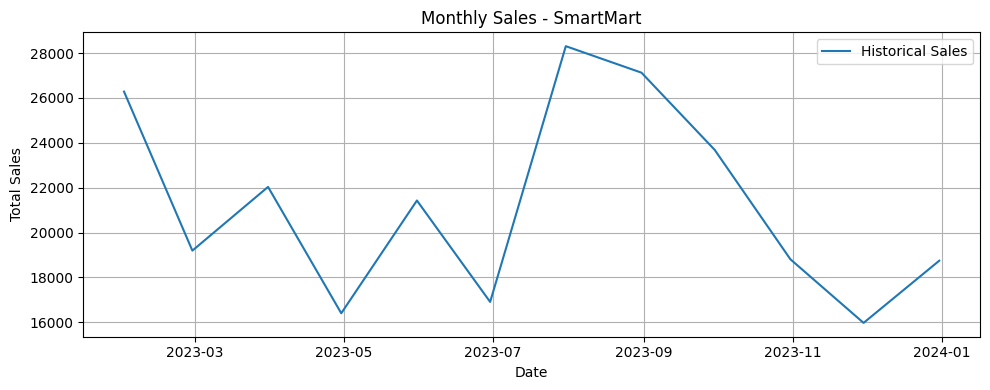

In [95]:
# ==========================================
# Time-Series Forecasting with ARIMA
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Load and prepare dataset
df = pd.read_csv("ICT603_A1.csv")
df['Date & Time'] = pd.to_datetime(df['Date & Time'])

# Resample monthly total sales
df.set_index('Date & Time', inplace=True)
monthly_sales = df['Total Transaction Amount'].resample('M').sum()

# Plot original time series
plt.figure(figsize=(10, 4))
plt.plot(monthly_sales, label='Historical Sales')
plt.title("Monthly Sales - SmartMart")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

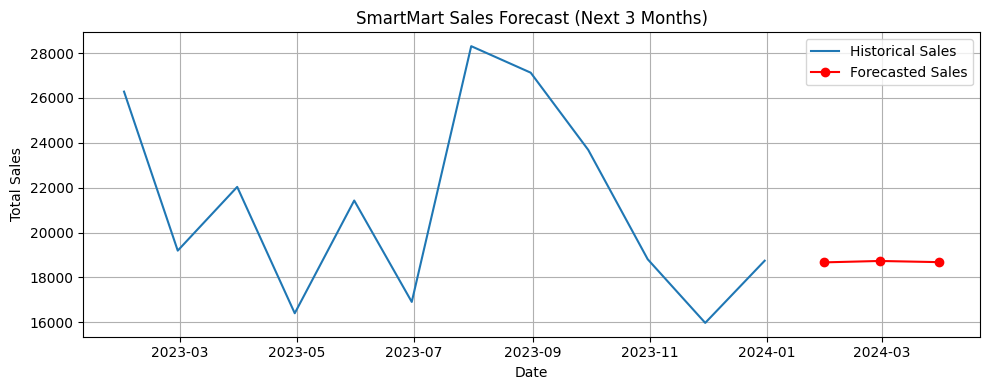

Forecasted Sales (Next 3 Months):
2024-01-31    18671.56
2024-02-29    18733.97
2024-03-31    18681.63
Freq: ME, Name: predicted_mean, dtype: float64


In [96]:

# Fiting ARIMA model (auto config: ARIMA(1,1,1))
model = ARIMA(monthly_sales, order=(1, 1, 1))  # (p,d,q)
model_fit = model.fit()

# Forecasting for next 3 months
forecast = model_fit.forecast(steps=3)
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=3, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# Ploting forecast with historical data
plt.figure(figsize=(10, 4))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_series, label='Forecasted Sales', color='red', marker='o')
plt.title("SmartMart Sales Forecast (Next 3 Months)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print forecasted values
print("Forecasted Sales (Next 3 Months):")
print(forecast_series.round(2))

